## Geração de Dados

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions

No conjunto de dados X colocamos os dados das colunas referentes às palavras. Basicamente X são todas as colunas menos a coluna target, definida na linha anterior. Já a variável y conserva apenas os dados do objetivo target.

## Criação de Bolhas de Dados

In [75]:
from sklearn.datasets.samples_generator import make_blobs

n_features = 2
n_samples = 300
n_classes = 4

_X, _y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=n_features, cluster_std = 1, random_state = 2)

O conjunto de dados $X$ possui dois atributos com valores gerados aleatoriamente

In [76]:
_X[:10]

array([[-5.78923077,  1.84873402],
       [-5.60379289,  1.55554448],
       [-1.75981273, -3.96991451],
       [-6.51977888,  0.99197731],
       [ 0.91100418, -1.59821873],
       [-1.61892392, -9.71765939],
       [-3.58063642,  1.7513662 ],
       [-0.78216181, -9.35497119],
       [-0.8118896 , -4.44914322],
       [-5.71076443,  1.50952296]])

O vetor de dados $y$ possui o valor das classes (centers).

In [77]:
_y[:10]

array([3, 3, 2, 3, 1, 0, 3, 0, 2, 3])

In [78]:
groups = ['A','B','C','D','E','F']
y_g = [groups[i] for i in _y]

In [79]:
import pandas as pd
data = pd.DataFrame({
    'x1' : _X[:,0], 
    'x2' : _X[:,1], 
    'target' : y_g})

data["target"] = data["target"].astype('category')

In [80]:
data.head()

,x1,x2,target
0,-5.789231,1.848734,D
1,-5.603793,1.555544,D
2,-1.759813,-3.969915,C
3,-6.519779,0.991977,D
4,0.911004,-1.598219,B


## Visualização dos Dados

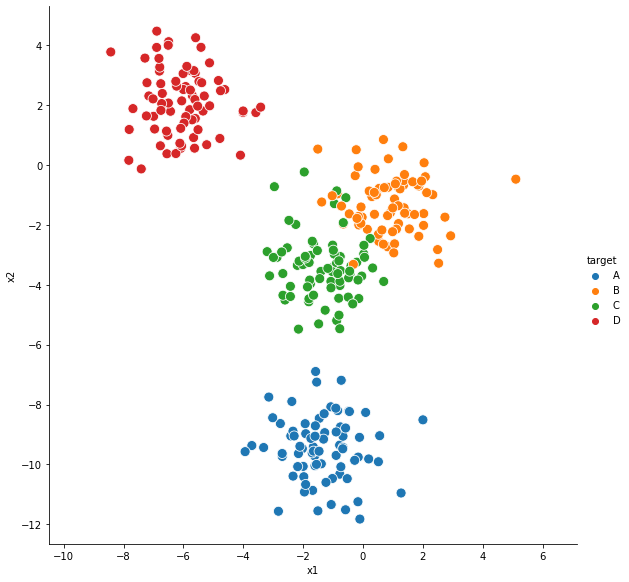

In [81]:
sns.relplot(x='x1', y='x2', hue='target', data = data, height=8, s=100)
plt.axis('equal')
plt.show()

## Escolha do Objetivo e Preparação dos Dados para Indução

Definindo qual é o nome da coluna que é nosso objetivo de predição (classificação)

In [82]:
target = "target"

No conjunto de dados X colocamos os dados das colunas referentes aos atributos. Basicamente X são todas as colunas menos a coluna target, definida na linha anterior. Já a variável y conserva apenas os dados do objetivo target.

In [83]:
X = data.drop([target], axis=1)
y = data[target].factorize()[0]

In [84]:
X.head()

,x1,x2
0,-5.789231,1.848734
1,-5.603793,1.555544
2,-1.759813,-3.969915
3,-6.519779,0.991977
4,0.911004,-1.598219


In [85]:
y[:6]

array([0, 0, 1, 0, 2, 3], dtype=int64)

## Separação dos Dados em Treino e Teste

Deixamos 25% para teste, a separação será estratificada e a semente é 10.

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=10)

## Definição do Classificador

In [87]:
# Definir o classificador
from sklearn import svm
#model = svm.SVC(C=1.0, kernel = "linear", max_iter = 1000)
model = svm.SVC(C=1.0, kernel = "rbf", max_iter = 10000)

In [88]:
# Printar o classificador para ver os seus parâmetros
model.fit(X_train, y_train)

SVC(max_iter=10000)

## Predição do Conjunto de Teste 

In [89]:
y_test_pred = model.predict(X_test)

In [90]:
y_test_pred

array([1, 2, 1, 1, 2, 3, 0, 3, 0, 0, 1, 2, 3, 3, 2, 0, 2, 3, 1, 1, 3, 2,
       2, 3, 2, 0, 1, 0, 3, 0, 1, 1, 0, 0, 0, 2, 2, 3, 1, 0, 1, 3, 2, 0,
       0, 3, 3, 2, 2, 2, 2, 0, 3, 3, 1, 3, 2, 3, 1, 2, 1, 1, 0, 1, 0, 1,
       2, 2, 2, 0, 3, 0, 3, 0, 3], dtype=int64)

## Avaliação da Predição

### Matriz de Confusão

In [91]:
from pandas import crosstab
crosstab(y_test, y_test_pred, rownames = ['y_test'], colnames = ['y_test_pred ->']  )

y_test_pred ->,0,1,2,3
y_test,,,,
0,19,0,0,0
1,0,17,2,0
2,0,0,18,0
3,0,0,0,19


Há uma outra forma direta de fazer a matriz de confusão, no entanto não é muito boa de visualizar, pois retorna apenas uma matriz.

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[19,  0,  0,  0],
       [ 0, 17,  2,  0],
       [ 0,  0, 18,  0],
       [ 0,  0,  0, 19]], dtype=int64)

### Métrica de Acurácia

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.9733333333333334

### Métricas de Avaliação por Classe: precision, recall e f1-score

In [94]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.89      0.94        19
           2       0.90      1.00      0.95        18
           3       1.00      1.00      1.00        19

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75



## Visualização das Predições

In [95]:
y

array([0, 0, 1, 0, 2, 3, 0, 3, 1, 0, 2, 0, 0, 3, 3, 2, 1, 3, 2, 0, 3, 3,
       1, 2, 0, 2, 1, 2, 3, 2, 1, 0, 1, 1, 3, 1, 3, 0, 0, 1, 1, 3, 2, 0,
       1, 3, 3, 3, 3, 2, 1, 2, 3, 1, 2, 3, 1, 3, 3, 0, 0, 1, 1, 2, 1, 3,
       0, 0, 2, 2, 3, 2, 3, 3, 0, 0, 0, 2, 1, 1, 3, 3, 2, 3, 1, 2, 2, 1,
       1, 3, 2, 3, 0, 3, 0, 0, 2, 0, 2, 2, 0, 1, 0, 3, 2, 1, 0, 3, 0, 0,
       2, 3, 3, 3, 0, 2, 2, 3, 1, 3, 2, 1, 2, 3, 0, 1, 2, 1, 1, 3, 1, 0,
       1, 2, 0, 1, 1, 0, 2, 0, 0, 2, 0, 3, 2, 1, 0, 2, 1, 1, 1, 3, 1, 2,
       2, 1, 2, 2, 3, 3, 3, 1, 1, 0, 1, 2, 3, 3, 0, 0, 1, 3, 1, 0, 0, 2,
       1, 1, 3, 0, 0, 1, 1, 2, 0, 1, 2, 3, 1, 2, 0, 3, 0, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 2, 0, 2, 0, 0, 3, 1, 2, 1, 3, 0, 0, 2, 2, 3, 2, 2, 1,
       2, 2, 3, 2, 3, 3, 1, 0, 2, 1, 3, 3, 2, 2, 1, 0, 3, 1, 2, 0, 2, 0,
       1, 2, 3, 2, 0, 3, 2, 3, 2, 3, 1, 3, 2, 2, 2, 3, 3, 0, 3, 1, 1, 3,
       3, 0, 3, 1, 3, 0, 1, 2, 0, 1, 3, 1, 0, 2, 0, 1, 0, 0, 3, 1, 0, 0,
       0, 0, 0, 3, 2, 0, 1, 3, 3, 2, 1, 2, 1, 0], d

Text(0.5, 1.0, 'SVM')

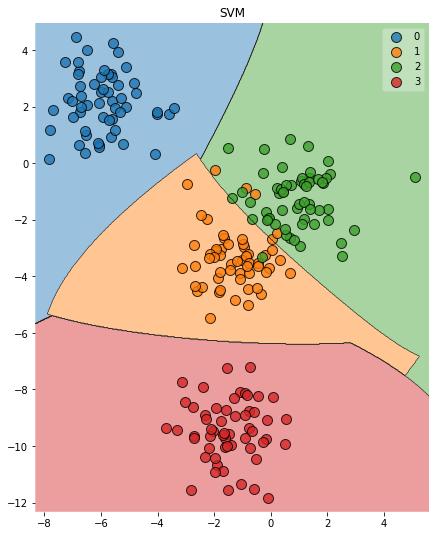

In [96]:
fig, ax = plt.subplots(figsize=(9, 9))
plot_decision_regions(X_train.to_numpy(), y_train, clf=model, legend=1, ax= ax, markers = 'o', zoom_factor = 2, scatter_kwargs = {'s': 100})
ax.set_aspect('equal')
ax.set_title('SVM')

Text(0.5, 1.0, 'SVM')

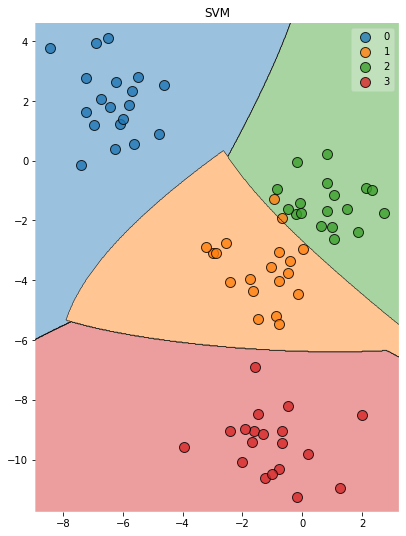

In [97]:
fig, ax = plt.subplots(figsize=(9, 9))
plot_decision_regions(X_test.to_numpy(), y_test, clf=model, legend=1, ax= ax, markers = 'o', zoom_factor = 2, scatter_kwargs = {'s': 100})
ax.set_aspect('equal')
ax.set_title('SVM') 